IMPORT NECCESARY PACKAGES AND DATASET

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Import Dataset
data = pd.read_csv(r"C:\Users\pc\Visual Studio Code\Housing Price Data\Housing.csv")

REMOVE DUPLICATES

In [181]:
# Loại bỏ các cột dữ liệu không cần thiết
data =  data.drop(columns = {'date','bathrooms','sqft_lot','view', 'grade','lat','long','zipcode','sqft_living15','sqft_lot15'})
data_cleaned = data.drop_duplicates(subset=['id'])
data_cleaned.shape

(21436, 11)

In [182]:
import numpy as np
# Chuyển đổi kiểu dữ liệu của các cột dữ liệu không cần thiết
data_cleaned["id"] = data_cleaned["id"].astype('object')
data_cleaned["waterfront"] = data_cleaned["waterfront"].astype('object')
data_cleaned.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_19048\967562116.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pc\AppData\Local\Temp\ipykernel_19048\967562116.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,price,bedrooms,sqft_living,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,7229300521,231300.0,2,1180,1.0,0,3,1180,0,1955,0
1,6414100192,538000.0,3,2570,2.0,0,3,2170,400,1951,1991
2,5631500400,180000.0,2,770,1.0,0,3,770,0,1933,0
3,2487200875,604000.0,4,1960,1.0,0,5,1050,910,1965,0
4,1954400510,510000.0,3,1680,1.0,0,3,1680,0,1987,0


NULL VALUES

In [183]:
# Kiểm tra các giá trị NA hoặc Null của tập dữ liệu
null_values =  data_cleaned.isnull().sum()
null_values

id               0
price            0
bedrooms         0
sqft_living      0
floors           0
waterfront       0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

REMOVE OUTLINE VALUES

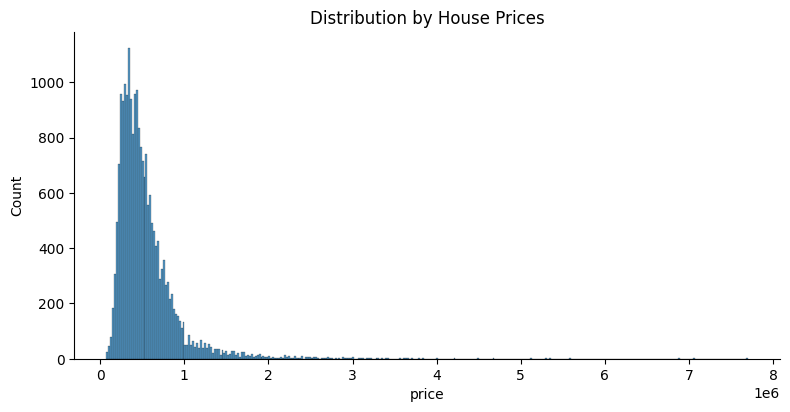

(21436, 11)

In [184]:
# PHÂN BỔ DỮ LIỆU GIÁ
import seaborn as sns
sns.displot(data_cleaned['price'], height=4, aspect=2)
plt.title("Distribution by House Prices")
plt.show()
data_cleaned.shape

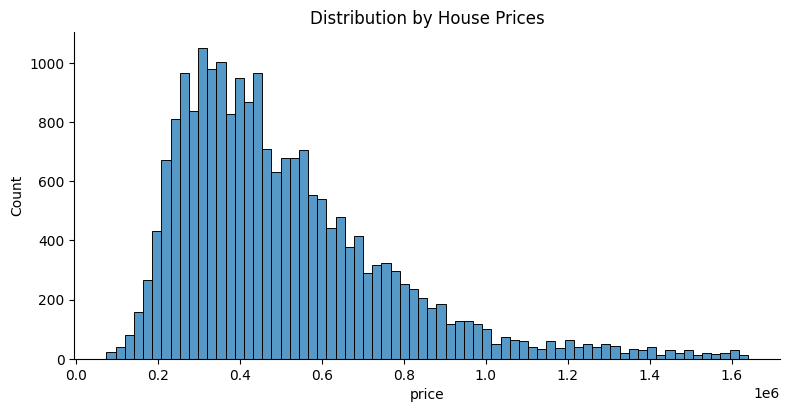

(21033, 11)

In [185]:
# Loại bỏ giá trị ngoại lai bằng phương pháp Z-Scores (Scipy Package)
from scipy import stats
import pandas as pd
z_scores = stats.zscore(data_cleaned['price'])

# Lọc dữ liệu để loại bỏ các giá trị có Z-score tuyệt đối > 3
df = data_cleaned[abs(z_scores) < 3]

sns.displot(df['price'], height=4, aspect=2)
plt.title("Distribution by House Prices")
plt.show()
df.shape

NUMERICAL FEATURES FOR DATA NUMBERS

In [186]:
# Thống kê mô tả cho các kiểu dữ liệu số
numerical_features = df.select_dtypes(include = [np.number])
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21033.0,507199.483669,259523.788116,75000.0,320000.0,447000.0,629000.0,1640000.0
bedrooms,21033.0,3.354348,0.920479,0.0,3.0,3.0,4.0,33.0
sqft_living,21033.0,2034.844055,837.751891,290.0,1420.0,1900.0,2510.0,7480.0
floors,21033.0,1.488970,0.539031,1.0,1.0,1.5,2.0,3.5
condition,21033.0,3.408739,0.648647,1.0,3.0,3.0,4.0,5.0
sqft_above,21033.0,1753.858033,773.517711,290.0,1190.0,1550.0,2170.0,7320.0
sqft_basement,21033.0,280.986022,425.490335,0.0,0.0,0.0,540.0,2850.0
yr_built,21033.0,1971.027386,29.293238,1900.0,1952.0,1975.0,1997.0,2015.0
yr_renovated,21033.0,80.369277,392.372042,0.0,0.0,0.0,0.0,2015.0


EDA (EXPLORATORY DATA ANALYSIS)

In [187]:
# Đổi tên một số cột dữ liệu để dễ dàng phân tích
df = df.rename(columns = {'sqft_living':'area_living', 'sqft_above':'area_above','sqft_basement':'area_basement','yr_built':'year_built','yr_renovated':'year_renovated'})
df.head()

,id,price,bedrooms,area_living,floors,waterfront,condition,area_above,area_basement,year_built,year_renovated
0,7229300521,231300.0,2,1180,1.0,0,3,1180,0,1955,0
1,6414100192,538000.0,3,2570,2.0,0,3,2170,400,1951,1991
2,5631500400,180000.0,2,770,1.0,0,3,770,0,1933,0
3,2487200875,604000.0,4,1960,1.0,0,5,1050,910,1965,0
4,1954400510,510000.0,3,1680,1.0,0,3,1680,0,1987,0


In [188]:
# Chuyển đổi các cột diện tích có đơn vị feet vuông sang mét vuông 
df['area_living'] = round(df['area_living']*0.092903,2)
df['area_above'] = round(df['area_above']*0.092903,2)
df['area_basement'] = round(df['area_basement']*0.092903,2)
df.head()

,id,price,bedrooms,area_living,floors,waterfront,condition,area_above,area_basement,year_built,year_renovated
0,7229300521,231300.0,2,109.63,1.0,0,3,109.63,0.00,1955,0
1,6414100192,538000.0,3,238.76,2.0,0,3,201.60,37.16,1951,1991
2,5631500400,180000.0,2,71.54,1.0,0,3,71.54,0.00,1933,0
3,2487200875,604000.0,4,182.09,1.0,0,5,97.55,84.54,1965,0
4,1954400510,510000.0,3,156.08,1.0,0,3,156.08,0.00,1987,0


['No', 'Yes']


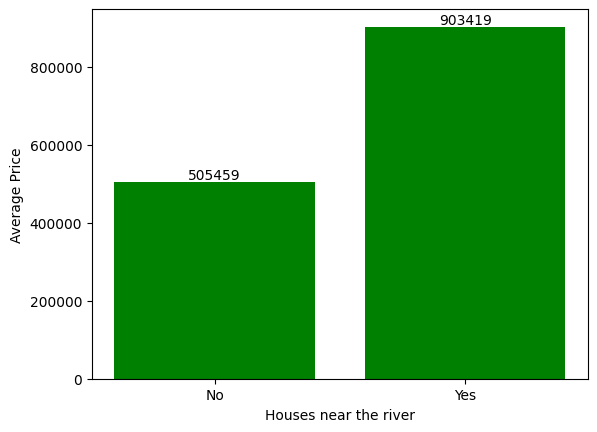

In [189]:
# GIÁ NHÀ TRUNG BÌNH THEO VỊ TRÍ ĐỊA LÝ (VIEW SÔNG)
df['waterfront'] = df['waterfront'].replace(1, "Yes")
df['waterfront'] = df['waterfront'].replace(0, "No")
river_place_price = df.groupby('waterfront')['price'].mean()
boolean = []
for answer, price in river_place_price.items():
    boolean.append(answer)
print(boolean)

fig, ax = plt.subplots()
bars = ax.bar(x = boolean, height = river_place_price, color = 'g')
ax.set_xlabel('Houses near the river')
ax.set_ylabel('Average Price')

for bar in bars:
    y_values = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, y_values, f'{y_values:.0f}', ha='center', va='bottom')
plt.show()

[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


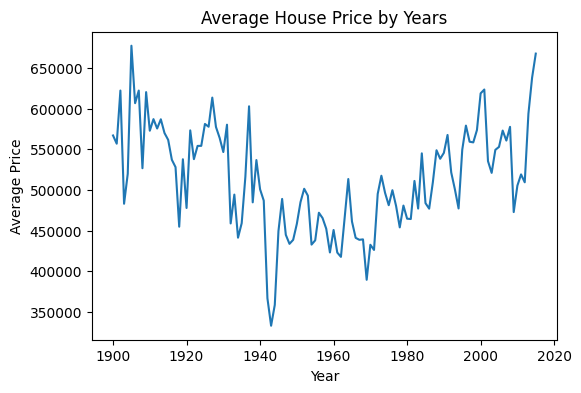

In [190]:
# GIÁ NHÀ THEO TỪNG NĂM
year_house_price = df.groupby('year_built')['price'].mean()
years = []
for year, price in year_house_price.items():
    years.append(year)
print(years)

fig, ax = plt.subplots(figsize = (6,4))
ax.plot(years, year_house_price)
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.set_title("Average House Price by Years")
plt.show()

In [191]:
bins = pd.cut(df['year_built'], bins=24, right=False, include_lowest=True)
labels = [f'{i}-{i+4}' for i in range(1900, 2020, 5)]
df['period'] = pd.cut(df['year_built'], bins=24, labels=labels, right=False, include_lowest=True)
df['period']

0        1955-1959
1        1950-1954
2        1930-1934
3        1965-1969
4        1990-1994
           ...    
21608    2010-2014
21609    2015-2019
21610    2010-2014
21611    2005-2009
21612    2010-2014
Name: period, Length: 21033, dtype: category
Categories (24, object): ['1900-1904' < '1905-1909' < '1910-1914' < '1915-1919' ... '2000-2004' < '2005-2009' < '2010-2014' < '2015-2019']

C:\Users\pc\AppData\Local\Temp\ipykernel_19048\1768614682.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\pc\AppData\Local\Temp\ipykernel_19048\1768614682.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



['1900-1904', '1905-1909', '1910-1914', '1915-1919', '1920-1924', '1925-1929', '1930-1934', '1935-1939', '1940-1944', '1945-1949', '1950-1954', '1955-1959', '1960-1964', '1965-1969', '1970-1974', '1975-1979', '1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019']


C:\Users\pc\AppData\Local\Temp\ipykernel_19048\1768614682.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



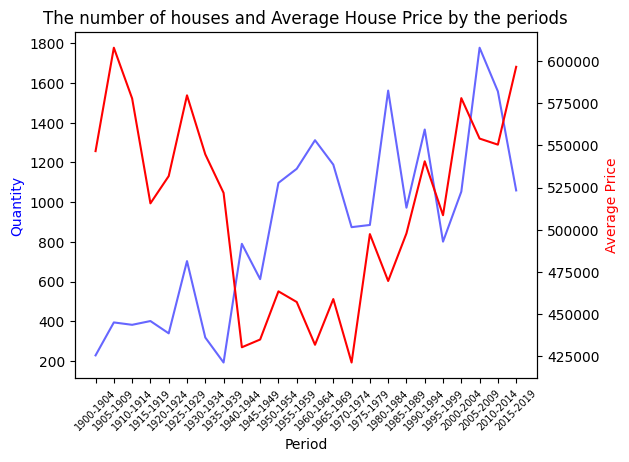

In [192]:
# SỐ LƯỢNG NHÀ VÀ GIÁ TRUNG BÌNH QUA TỪNG GIAI ĐOẠN
house_numbers_period = df.groupby('period')['id'].count()
house_price_period = df.groupby('period')['price'].mean()
period = []
for year, price in house_price_period.items():
    period.append(year)
print(period)

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize = (6,4))
ax1.plot(period,house_numbers_period, color='b', alpha=0.6, label='Quantity')
ax2 = ax1.twinx()
ax2.plot(period, house_price_period, color='r', label='Price')
plt.tight_layout()
ax1.set_xlabel('Period')
ax1.set_xticklabels(period, rotation = 45, size = 7)
ax1.set_ylabel('Quantity', color='b')
ax2.set_ylabel('Average Price', color='r')
ax1.set_title('The number of houses and Average House Price by the periods')
plt.show()

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
[49.87, 8.88, 37.73, 0.65, 2.84, 0.03]


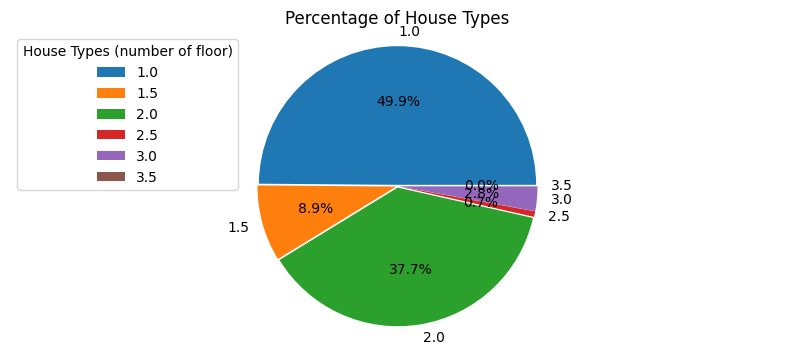

In [193]:
# PHÂN BỔ LOẠI HÌNH NHÀ
house_types_count = df.groupby('floors')['id'].count()
house_types = []
for form, id in house_types_count.items():
    house_types.append(form)
print(house_types)

house_types_percent = []
for percent in house_types_count:
    percent = round(percent/len(df['id'])*100,2)
    house_types_percent.append(percent)
print(house_types_percent)

fig, ax = plt.subplots(figsize = (10,4))
ax.pie(house_types_percent, explode = [0.01,0.01,0.01,0.01,0.01,0.01], labels = house_types, startangle = 0, autopct='%1.1f%%')
ax.axis('equal')
ax.legend(title = 'House Types (number of floor)')
ax.set_title('Percentage of House Types')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_19048\860194088.py:9: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



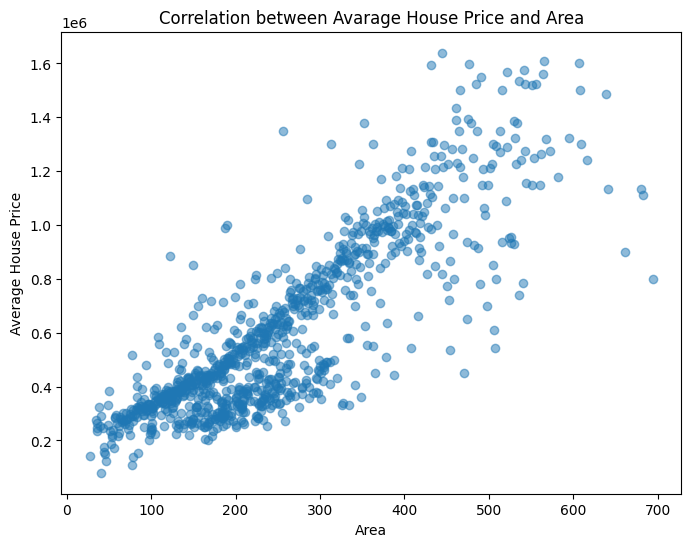

In [194]:
# MỐI TƯƠNG QUAN GIỮA GIÁ NHÀ VÀ DIỆN TÍCH
import pandas as pd
area_house_price = df.groupby('area_living')['price'].mean()
areas = []
for area, price in area_house_price.items():
    areas.append(area)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(areas, area_house_price, cmap = 'viridis', alpha = 0.5)
ax.set_xlabel('Area')
ax.set_ylabel('Average House Price')
ax.set_title('Correlation between Avarage House Price and Area')

plt.show()

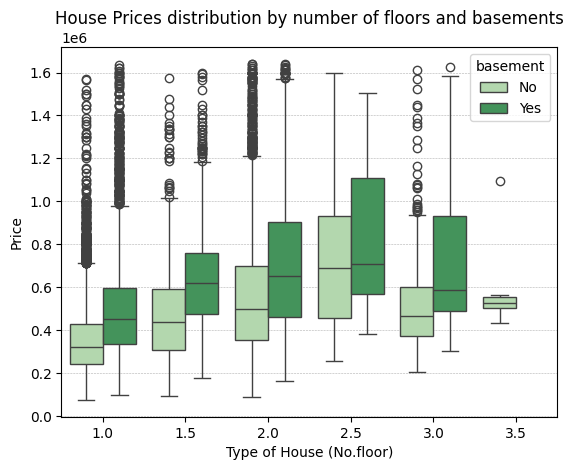

(21033, 13)

In [195]:
df['basement'] = np.where(df['area_basement'] > 0, "Yes", "No")
# Phân bổ giá nhà theo số tầng và tầng hầm
df_new = df[['price','floors','basement']]
sns.boxplot(data = df_new, x = df_new['floors'], y = df_new['price'], hue = df_new['basement'], palette = 'Greens')
plt.xlabel('Type of House (No.floor)')
plt.ylabel('Price')
plt.title('House Prices distribution by number of floors and basements')
plt.grid(axis = "y", linestyle='--', linewidth = 0.4)
plt.show()
df_new.shape
df.shape

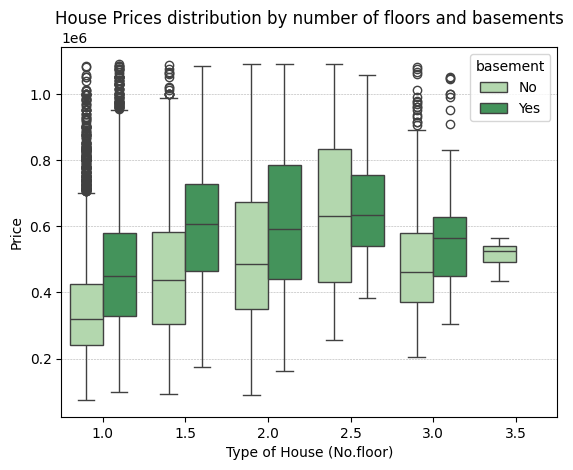

,price,floors,basement
0,231300.0,1.0,No
1,538000.0,2.0,Yes
2,180000.0,1.0,No
3,604000.0,1.0,Yes
4,510000.0,1.0,No


In [196]:
# Loại bỏ các giá trị ngoại lai bằng phương pháp IQR và vẽ lại biểu đồ boxplot
Q1 = df_new['price'].quantile(0.25)
Q3 = df_new['price'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR

# PHÂN BỔ GIÁ NHÀ THEO LOẠI HÌNH 
df_new2 = df_new[(df_new['price'] >= low) & (df_new['price'] <= high)]
import seaborn as sns
sns.boxplot(data = df_new2, x = df_new2['floors'], y = df_new2['price'], hue = df_new2['basement'], palette = 'Greens')
plt.xlabel('Type of House (No.floor)')
plt.ylabel('Price')
plt.title('House Prices distribution by number of floors and basements')
plt.grid(axis = "y", linestyle='--', linewidth = 0.4)
plt.show()
df_new2.shape
df_new2.head()

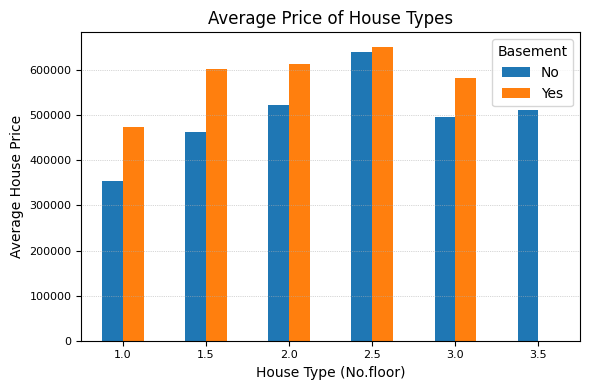

In [197]:
# GIÁ TRUNG BÌNH THEO TỪNG LOẠI NHÀ
house_types_price = df_new2.groupby(['floors', 'basement'])['price'].mean().unstack()
barchat = house_types_price.plot(kind = 'bar', figsize = (6,4))
plt.xlabel("House Type (No.floor)", size = 10)
plt.xticks(rotation = 0, size =8)
plt.ylabel('Average House Price', size = 10)
plt.yticks(rotation = 0, size =8)
plt.title("Average Price of House Types")
plt.grid(axis = 'y', linestyle = ":", linewidth = 0.5)
plt.legend(title = 'Basement')

plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_19048\1020624662.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



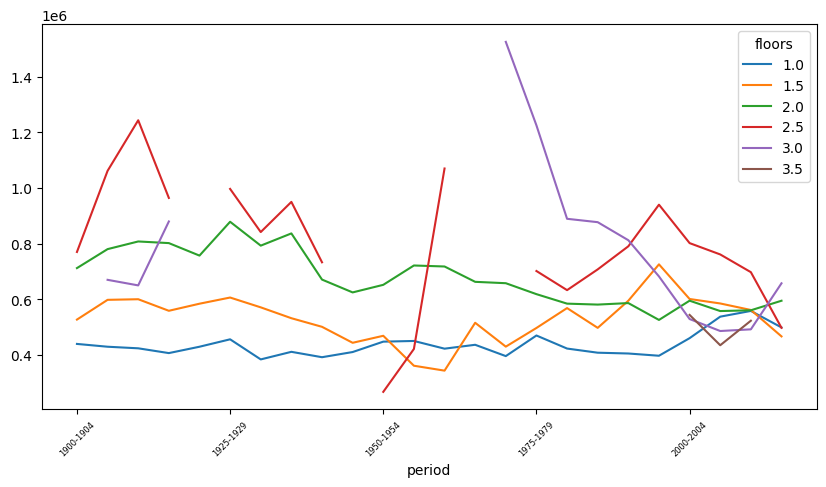

In [198]:
# GIÁ CÁC LOẠI NHÀ THEO TỪNG GIAI ĐOẠN
house_types_price_period = df.groupby(['period', 'floors'])['price'].mean().unstack()
house_types_price_period.plot(figsize = (10,5))
plt.xticks(rotation = 45, size = 6)
plt.show()

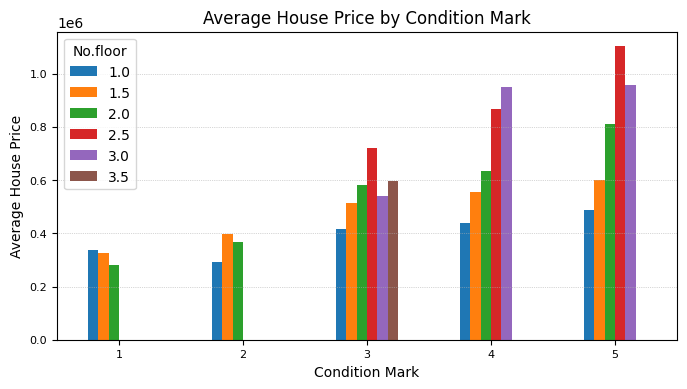

In [199]:
# MỐI TƯƠNG QUAN GIỮA ĐIỂM ĐIỀU KIỆN VÀ GIÁ (THEO LOẠI NHÀ)
house_price_condition = df.groupby(['condition', 'floors'])['price'].mean().unstack()
house_price_condition.plot(kind = 'bar', figsize = (8,4))
plt.xlabel("Condition Mark")
plt.xticks(rotation = 0, size = 8)
plt.ylabel("Average House Price")
plt.yticks(size = 8)
plt.title("Average House Price by Condition Mark")
plt.legend(title = "No.floor")
plt.grid(axis = 'y', linestyle = ':', linewidth = 0.5)
plt.show()

In [200]:
# PHÂN BỔ NHÀ THEO ĐIỂM ĐIỀU KIỆN
house_condition_count = df.groupby('condition')['id'].count()
house_condition_percent = []
for number in house_condition_count:
    ratio = round(number/len(df['id'])*100, 2)
    house_condition_percent.append(ratio)

condition = []
for percent, id in house_condition_count.items():
    condition.append(percent)

import plotly.graph_objects as go

fig = go.Figure(go.Treemap(labels=condition, parents=[" Category"] * len(condition), values=house_condition_percent))
fig.update_layout(title="Distribution of Condition Mark", width=800, height=400)
fig.show()

['No', 'Yes']


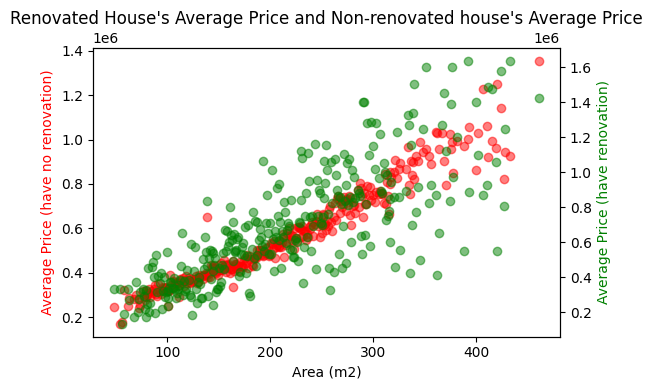

In [201]:
# NHÀ CÓ BẢO DƯỠNG VÀ KHÔNG BẢO DƯỠNG
import numpy as np
df['renovation'] = np.where(df['year_renovated'] == 0, 'No', 'Yes')
house_renovated_price = df.groupby('renovation')['price'].mean()
renovation = []
for fix, price in house_renovated_price.items():
    renovation.append(fix)
print(renovation)

# Tạo Dataframe chứa các giá trị diện tích có thực hiện bảo dưỡng
house_price_renovated = df.groupby(['area_living','renovation'])['price'].mean().unstack()
house_price_renovated = house_price_renovated.dropna()
house_price_renovated
area_living_values = house_price_renovated.index

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(6,4))
ax1.scatter(area_living_values, house_price_renovated['No'], label='Average Price', color = 'red', alpha = 0.5)
ax1.set_xlabel('Area (m2)')
ax1.set_ylabel('Average Price (have no renovation)', color = 'red')
ax2 = ax1.twinx()
ax2.scatter(area_living_values, house_price_renovated['Yes'], label='Average Price', color = 'green', alpha = 0.5)
ax2.set_ylabel('Average Price (have renovation)', color = 'green')
plt.title("Renovated House's Average Price and Non-renovated house's Average Price")
plt.tight_layout()

plt.show()

LINEAR REGRESSION MODELS

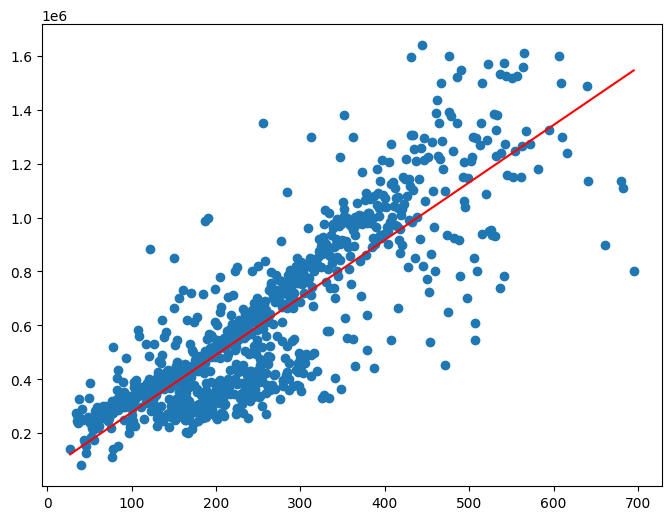

Linear Regression Formula: y = 63129.50 + 2134.75 * x
r2: 72.0 %
mae: 127341.52958803166
mape: 25.0%


In [202]:
# Mô hình hồi quy giá nhà trung bình theo diện tích
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
areas = np.array(areas).reshape(-1, 1)

regr = LinearRegression()
regr.fit(areas, area_house_price)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(areas, area_house_price)
ax.plot(areas, regr.predict(areas), color='red')
plt.show()

# Phương trình hồi quy
intercept = regr.intercept_
slope = regr.coef_[0] 
print(f"Linear Regression Formula: y = {intercept:.2f} + {slope:.2f} * x")

#Kiểm tra độ phù hợp và sai số tuyệt đối của mô hình
from sklearn.metrics import mean_squared_error, r2_score
r2 = round(r2_score(area_house_price, regr.predict(areas)),2) *100
print(f"r2: {r2} %")
mae = mean_absolute_error(area_house_price, regr.predict(areas))
print(f"mae: {mae}")
mape = round(mean_absolute_percentage_error(area_house_price, regr.predict(areas)),2)*100 
print(f"mape: {mape}%")

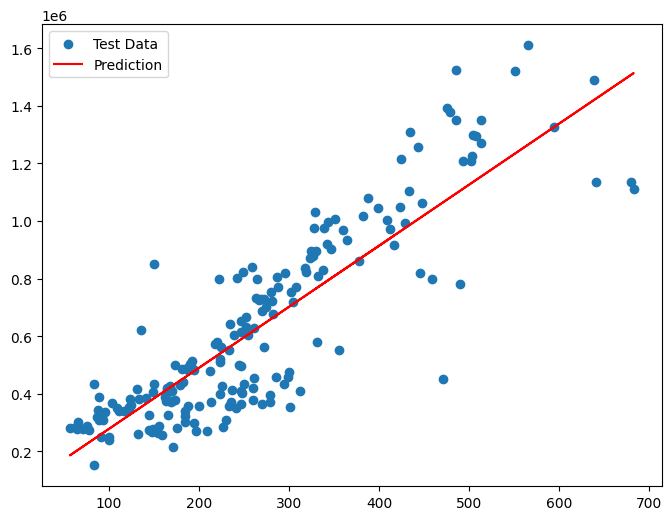

Linear Regression Formula: y = 66611.38 + 2118.88 * x
r2: 76.0 %
mae: 125188.72855705574
mape: 24.0%


In [ ]:
# HUẤN LUYỆN VÀ KIỂM TRA MÔ HÌNH
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

areas_train, areas_test, prices_train, prices_test = train_test_split(areas, area_house_price, test_size=0.2, random_state=42)
regr = LinearRegression()

# Huấn luyện mô hình với training set
regr.fit(areas_train, prices_train)

# Dự đoán giá nhà với test set
prices_pred = regr.predict(areas_test)

# Vẽ đồ thị
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(areas_test, prices_test, label="Test Data")
ax.plot(areas_test, prices_pred, color='red', label="Prediction")
plt.legend()
plt.show()

# Phương trình hồi quy
intercept = regr.intercept_
slope = regr.coef_[0] 
print(f"Linear Regression Formula: y = {intercept:.2f} + {slope:.2f} * x")

# #Kiểm tra độ phù hợp và sai số tuyệt đối của mô hình trên test set
r2 = round(r2_score(prices_test, prices_pred), 2) * 100
print(f"r2: {r2} %")
mae = mean_absolute_error(prices_test, prices_pred)
print(f"mae: {mae}")
mape = round(mean_absolute_percentage_error(prices_test, prices_pred),2)*100
print(f"mape: {mape}%")

In [204]:
# Dự đoán giá nhà với một vài giá trị diện tích cụ thể
import numpy as np
area_info = np.array([[350], [200], [500], [1100]]) # Mảng 2D (4,1)
for i in area_info:
    price_info = regr.predict(np.array([i]))
    print(price_info[0])

808221.0361445466
490388.3281929621
1126053.744096131
2397384.5759024685


K-MEANS MODEL

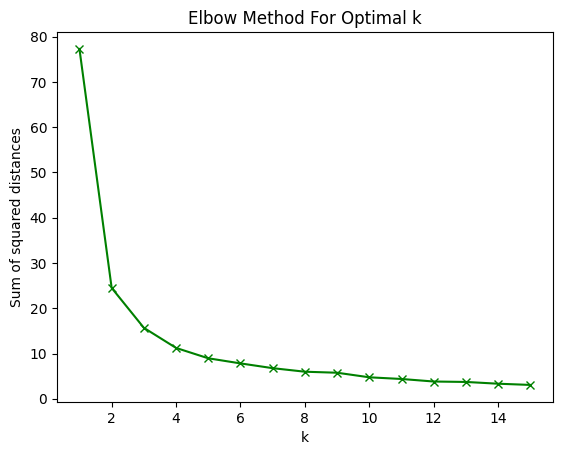

In [205]:
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

area_house_price
area_house_price = area_house_price.reset_index()

# Xác định số cụm tối ưu cho mô hình và chuẩn hóa dữ liệu
mms = MinMaxScaler()
data_transform = mms.fit_transform(area_house_price)

Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transform)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

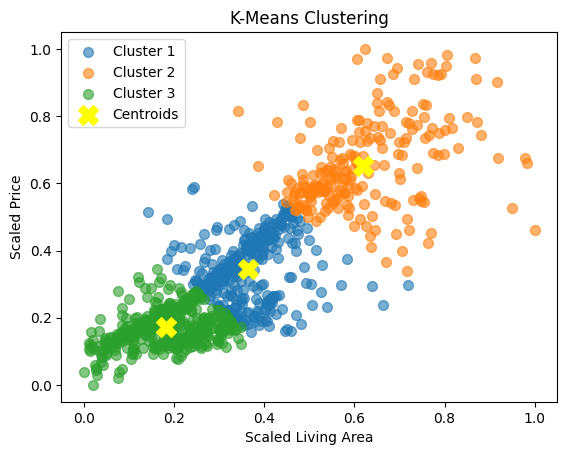

In [206]:

# Sau khi xác định số cụm phù hợp (3), ta tiến hành xây dựng mô hình K-means
from sklearn.cluster import KMeans
Km = KMeans(n_clusters = 3, random_state = 42)
Km.fit(data_transform)
# Lấy nhãn của các cụm
labels = Km.labels_

# Vẽ biểu đồ phân cụm 
plt.scatter(data_transform[labels == 0, 0], data_transform[labels == 0, 1], s=50, label=f'Cluster 1', alpha=0.6)
plt.scatter(data_transform[labels == 1, 0], data_transform[labels == 1, 1], s=50, label=f'Cluster 2', alpha=0.6)
plt.scatter(data_transform[labels == 2, 0], data_transform[labels == 2, 1], s=50, label=f'Cluster 3', alpha=0.6)

# Vẽ các tâm cụm
plt.scatter(Km.cluster_centers_[:, 0], Km.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroids')

plt.xlabel('Scaled Living Area')
plt.ylabel('Scaled Price')
plt.title('K-Means Clustering')

plt.legend()
plt.show()